"""

@Author: Naveen Madev Naik</br>
@Date: 2024-10-08</br>
@Last Modified by: Naveen Madev Naik</br>
@Last Modified time: 2024-10-08</br>
@Title:Classification using k nearest neighbors</br>

"""

### 1. The data given in the url is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to predict whether client will subscribe to term deposit</br> https://drive.google.com/openid=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns


Loading the data

In [3]:
#loading data
data_df = pd.read_csv("C:/Users/naikn/OneDrive/Documents/python/Machine_learning/Classification/bank.csv",sep=';')

In [4]:
data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
data_df.shape

(4521, 17)

Label Encoding

In [7]:
label_encoder =LabelEncoder()

In [8]:
# Encode other categorical features
categorical_cols = data_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data_df[col] = label_encoder.fit_transform(data_df[col])

In [9]:
data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [10]:
data_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


Correlation matrix

In [11]:
correlation_matrix = data_df.iloc[:,:-1].corr()
correlation_matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714


Scaling the data

In [12]:
scaler =StandardScaler()

In [13]:
features = ['age','balance','day','duration','campaign','pdays','previous']

data_df[features] =scaler.fit_transform(data_df[features])

In [14]:
data_df.shape

(4521, 17)

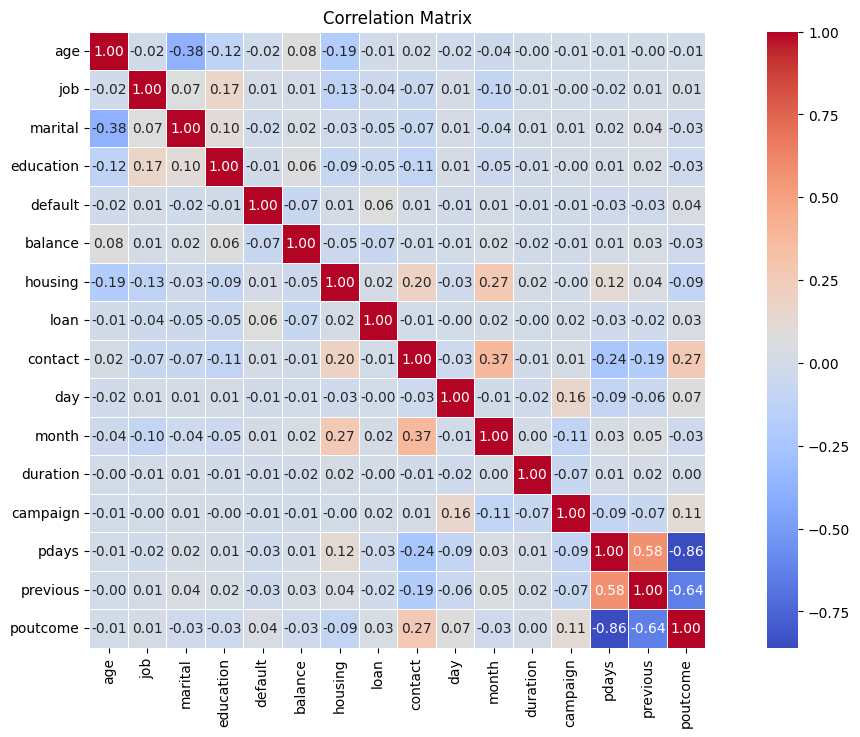

In [15]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True,fmt='.2f', cmap='coolwarm',square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [16]:
data_df=data_df.drop(['pdays'],axis=1)

In [17]:
data_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,-1.056270,10,1,0,0,0.121072,0,0,0,0.374052,10,-0.711861,-0.576829,-0.320413,3,0
1,-0.772583,7,1,1,0,1.118644,1,1,0,-0.596026,8,-0.169194,-0.576829,2.041734,0,0
2,-0.583458,4,2,2,0,-0.024144,1,0,0,0.010273,0,-0.303898,-0.576829,0.270124,0,0
3,-1.056270,4,1,2,0,0.017726,1,1,2,-1.566105,6,-0.250017,0.387967,-0.320413,3,0
4,1.686036,1,1,1,0,-0.472753,1,0,2,-1.323585,8,-0.146102,-0.576829,-0.320413,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,7,1,1,0,-0.583410,1,0,0,1.707910,5,0.250315,0.709566,-0.320413,3,0
4517,1.496912,6,1,2,1,-1.573671,1,1,2,-0.838546,8,-0.427057,-0.576829,-0.320413,3,0
4518,1.496912,9,1,1,0,-0.374724,0,0,0,0.374052,1,-0.434754,2.639160,-0.320413,3,0
4519,-1.245394,1,1,1,0,-0.094925,0,0,0,-1.202326,3,-0.519426,0.387967,1.451197,1,0


Splitting the data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_df.iloc[:,:-1], data_df[['y']], test_size=0.3,random_state=41)

Model Fitting

In [19]:
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

c:\Users\naikn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

Predicting the result

In [20]:
y_pred= classifier.predict(x_test)  

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [22]:
y_test

,y
4060,0
137,0
3005,1
2003,0
2261,0
...,...
1960,0
3137,0
2530,0
1419,0


Confusion matrix

In [23]:
conf_matrix = confusion_matrix(np.array(y_test), y_pred)
print("confusion matrix: ") 
print(conf_matrix)

confusion matrix: 
[[1165   26]
 [ 131   35]]


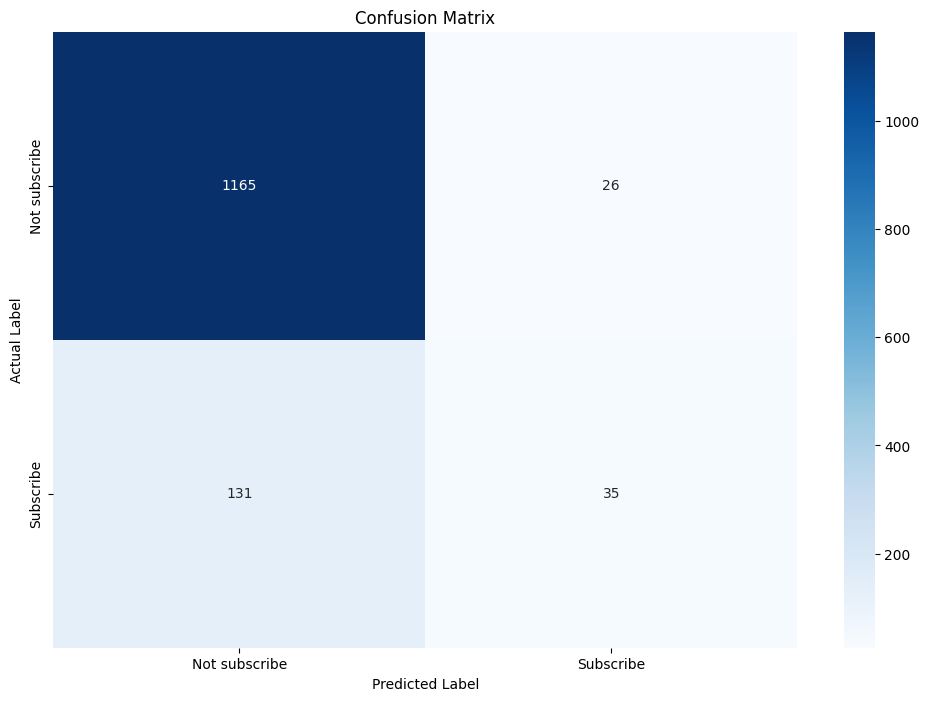

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not subscribe','Subscribe'], 
            yticklabels=['Not subscribe','Subscribe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.88
Precision: 0.57
Recall: 0.21
F1 Score: 0.31


ROC Curve

In [26]:
y_prob= classifier.predict_proba(x_test)[:,1]
print(y_prob)

false_positive_rate ,true_positive_rate,threshold =roc_curve(y_test,y_prob)
print(threshold)
roc_auc =auc(false_positive_rate,true_positive_rate)
print(roc_auc)

[0.         0.         0.33333333 ... 0.         0.         0.66666667]
[       inf 1.         0.66666667 0.33333333 0.        ]
0.7292570786926041


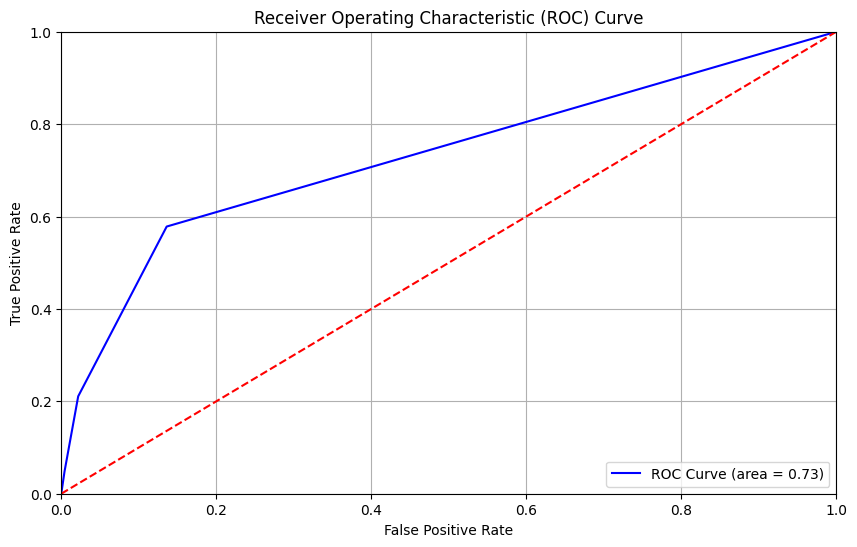

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 2. Build a machine learning model to predict whether a person makes over 50K a year or not https://drive.google.com/open?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF

Loading Data

In [28]:
# Loading the data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data_df = pd.read_csv('C:/Users/naikn/OneDrive/Documents/python/Machine_learning/Classification/classification.csv', header=None,names=columns)

In [29]:
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
data_df.shape

(32561, 15)

In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Handling Data

In [32]:
# Handling missing values (replace '?' with NaN and drop missing)
data_df.replace(' ?', np.nan, inplace=True)
data_df.dropna(inplace=True)

In [33]:
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Label Encoding

In [34]:
# # Encoding categorical features
label_encoder = LabelEncoder()
for column in data_df.select_dtypes(include=['object']).columns:
     data_df[column] = label_encoder.fit_transform(data_df[column])

In [35]:
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


Correlation matrix

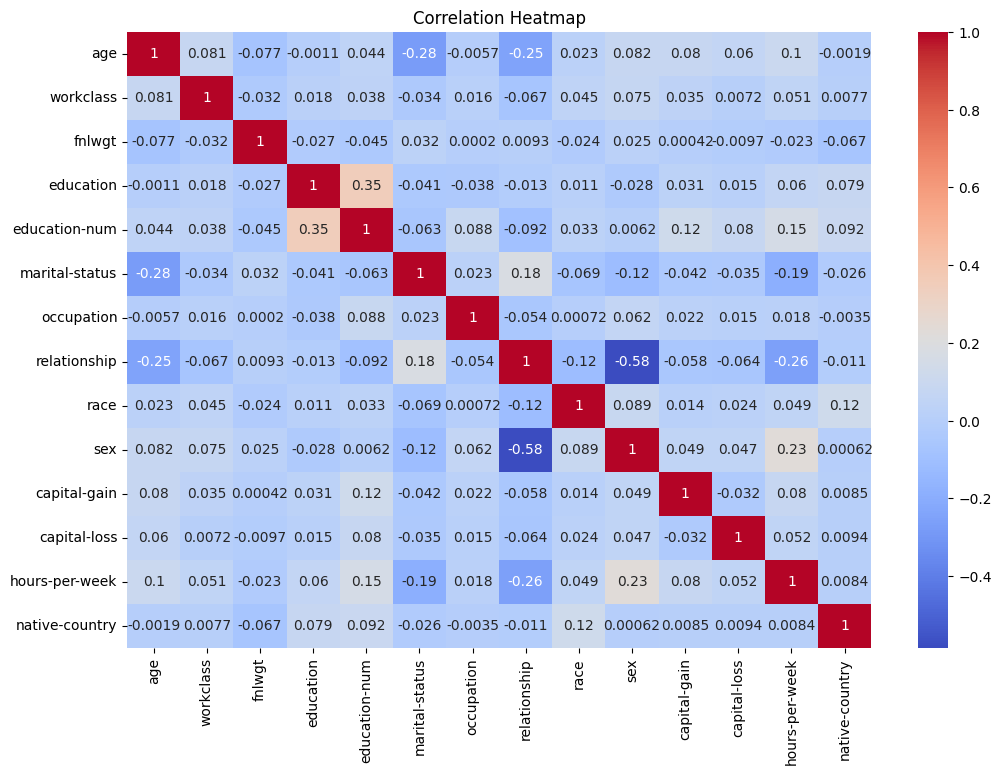

In [47]:
x = data_df.drop(['income'],axis=1)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Scaling

In [37]:
scaler = StandardScaler()
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data_df[numeric_columns] = scaler.fit_transform(data_df[numeric_columns])

Splitting Data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data_df.drop(['income'],axis=1), data_df['income'], test_size=0.3, random_state=42)

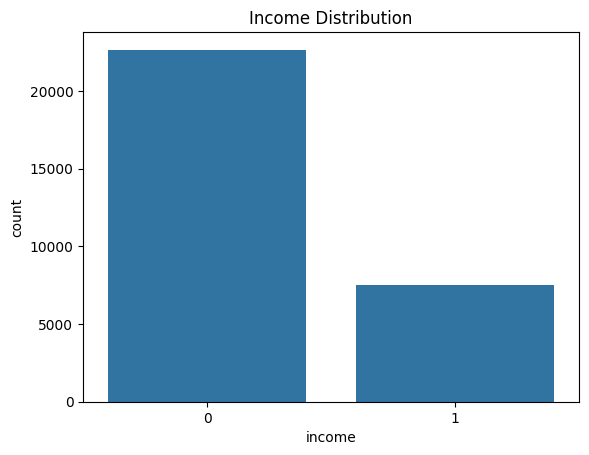

In [39]:
# Visualize the distribution of the 'income' target variable
sns.countplot(x='income', data=data_df)
plt.title('Income Distribution')
plt.show()

In [40]:
data_df['income'] = data_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [41]:
data_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.042796,5,-1.062722,9,1.128918,4,0,1,4,1,0.146092,-0.218586,-0.077734,38,0
1,0.880288,4,-1.007871,9,1.128918,2,3,0,4,1,-0.147445,-0.218586,-2.331531,38,0
2,-0.033340,2,0.244693,11,-0.439738,0,5,1,4,1,-0.147445,-0.218586,-0.077734,38,0
3,1.108695,2,0.425240,1,-1.224066,2,5,0,2,1,-0.147445,-0.218586,-0.077734,38,0
4,-0.794697,2,1.406658,9,1.128918,2,9,5,2,0,-0.147445,-0.218586,-0.077734,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,2,0.638972,7,0.736754,2,12,5,4,0,-0.147445,-0.218586,-0.244682,38,0
32557,0.118931,2,-0.335252,11,-0.439738,2,6,0,4,1,-0.147445,-0.218586,-0.077734,38,0
32558,1.489374,2,-0.358575,11,-0.439738,6,0,4,4,0,-0.147445,-0.218586,-0.077734,38,0
32559,-1.251511,2,0.110705,11,-0.439738,4,0,3,4,1,-0.147445,-0.218586,-1.747213,38,0


Model fitting

In [42]:
# Using K-Nearest Neighbors for prediction
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Model Evaluation
y_pred = knn_model.predict(X_test)

In [44]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8252845618300365

confusion matrix

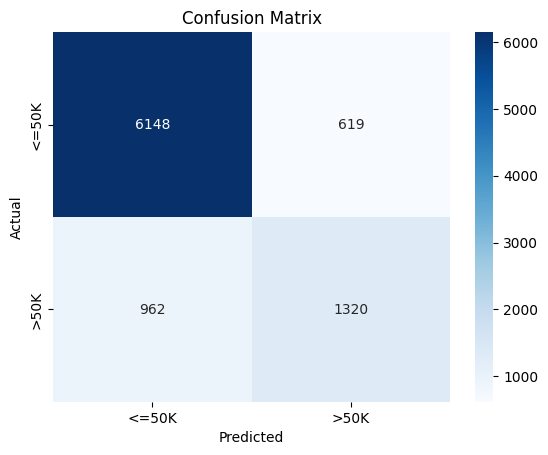

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ROC Curve

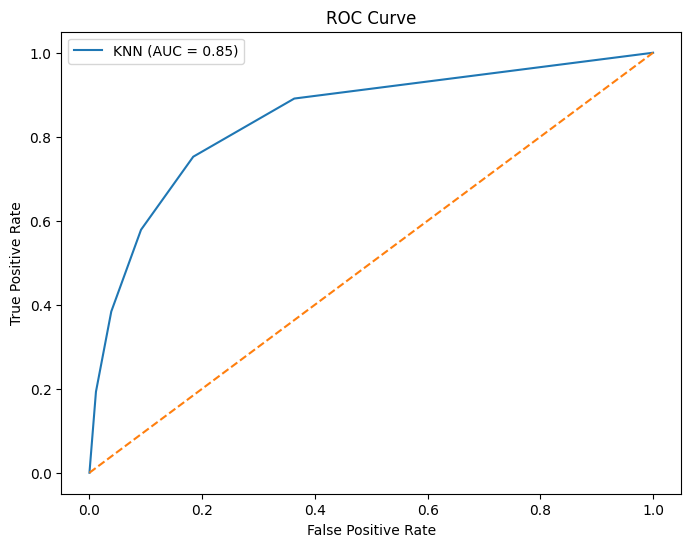

In [46]:

# ROC Curve
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()